# **Urban Heat Island (UHI): Study and Analysis for National Capital Territory (NCT) of Delhi**


**This is compilation of all the programs for LST and UHI calculation using Python. These programs act as a One stop Solution for UHI Calculation, from dowloading data from Earth Explorer to deriving LST and UHI out of LST.**

# 1. Installing all the required libraries

In [1]:
# installing all the required libraries
!pip install landsatxplore folium rasterio geopandas pylandtemp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 2.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of geopandas to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of fiona to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 4.1 MB/s eta 

The landsatxplore library is a Python package designed to facilitate the search
and download of Landsat satellite imagery from the USGS EarthExplorer portal.
This library allows users to programmatically search for Landsat data based on
specific criteria such as date range,cloud cover percentage, location, and specific
Landsat missions (e.g., Landsat 8, Landsat 9). It also provides an interface to
download the selected imagery directly, simplifying the process of acquiring
satellite data for analysis.

1. rasterio is used to read the rasters
2. numpy is often used in processing raster data for operations like mathematical transformations or array manipulations.
3. matplotlib for visullisation

# 2. Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In order to add the shapefile of our Area of interest we are that is saved in Google Drive we are mounting the Drive.

# 3. Downloading data

In [3]:
# this code prompts user to enter your USGS credentials
# allows to select a scene with date info

from landsatxplore.api import API
from landsatxplore.earthexplorer import EarthExplorer
import getpass
import os
from datetime import datetime, timedelta

# Prompt user for username and password (password input is hidden)
username = input("Enter your EarthExplorer username: ")
password = getpass.getpass("Enter your EarthExplorer password: ")

# Initialize a new API instance and get an API key
api = API(username, password)

# Search for Landsat 8/9 scenes in the specified date range
scenes = api.search(
    dataset='landsat_ot_c2_l1',  # dataset identifier for Landsat 8/9 Collection 2 Level 1 data
    latitude=28.6139,
    longitude=77.2090,
    start_date='2023-05-15',
    end_date='2023-06-15',
    max_cloud_cover=20
)

# Print the number of scenes found
print(f"{len(scenes)} scenes found.")

# Function to convert Julian Day to a date
def julian_day_to_date(year, julian_day):
    return datetime(year, 1, 1) + timedelta(days=julian_day - 1)

# Display the list of scenes for user selection
print("\nAvailable Scenes:")
for index, scene in enumerate(scenes):
    display_id = scene.get('displayId', scene['entity_id'])

    # Extract the year and Julian Day from displayId
    year = int(display_id[9:13])
    julian_day = int(display_id[13:16])

    # Convert Julian Day to standard date
    acquisition_date = julian_day_to_date(year, julian_day).strftime('%Y-%m-%d')

    print(f"{index + 1}. {display_id} - {acquisition_date}")

# Prompt the user to select which scenes to download
selected_indices = input("\nEnter the numbers of the scenes you want to download (comma-separated): ")
selected_indices = [int(i.strip()) - 1 for i in selected_indices.split(',')]

# Initialize a new EarthExplorer instance
ee = EarthExplorer(username, password)

# Download each selected scene
output_dir = '/content/landsat8_data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for index in selected_indices:
    scene = scenes[index]
    entity_id = scene['entity_id']
    display_id = scene.get('displayId', entity_id)

    print(f"Downloading all files for {display_id}...")

    # Download the entire scene
    ee.download(entity_id, output_dir)

# Logout from EarthExplorer
ee.logout()

# Logout from the API
api.logout()

Enter your EarthExplorer username: adscorpmail
Enter your EarthExplorer password: ··········
3 scenes found.

Available Scenes:
1. LC81460402023161LGN00 - 2023-06-10
2. LC91470402023160LGN03 - 2023-06-09
3. LC91460402023153LGN00 - 2023-06-02

Enter the numbers of the scenes you want to download (comma-separated): 3
Download failed with dataset id 1 of 2. Re-trying with the next one.


100%|██████████| 1.22G/1.22G [03:40<00:00, 5.92MB/s]


This script allows users to download Landsat data from the USGS EarthExplorer platform. It begins by prompting for user credentials, a date range, maximum cloud cover, and geographical coordinates. After initializing the API and searching for relevant scenes based on these inputs, it displays the available scenes for the user to select from. The user then chooses which scenes to download. The script downloads the selected scenes to a specified directory, and finally, it logs out of both the EarthExplorer and API sessions to ensure secure termination.

Note: change the values of `latitude,longitude,start_date,end_date,max_cloud_cover` as per your requirement.

# 4. Extracting files

In [4]:

# for extracting tar file in the colab itself

import tarfile
import os

# Define the path to the .tar file
tar_file_path = '/content/landsat8_data/LC09_L1TP_146040_20230602_20230602_02_T1.tar'

# Define the extraction directory
extraction_path = '/content/extracted_files/'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extraction_path):
    os.makedirs(extraction_path)

# Open the .tar file and extract all its contents
with tarfile.open(tar_file_path, 'r') as tar_file:
    tar_file.extractall(path=extraction_path)

print(f'Files extracted to {extraction_path}')


Files extracted to /content/extracted_files/


This code extracts the contents of a .tar file in Google Colab. It imports the tarfile and os modules to handle file extraction and directory operations. The path to the .tar file (tar_file_path) and the extraction directory (extraction_path) are defined. The script checks if the extraction directory exists, creating it if necessary. It then opens the .tar file in read mode and extracts all files to the specified directory using tarfile.open() and extractall(). Finally, it prints a message confirming the files have been extracted to the specified location.

Note: before executing the code, copy the file path of .tar file dowloaded in the landsat folder, and paste it in the `tar_file_path`.

# 5. Module for Masking

In [5]:
# making module for masking outputs
# provides a function to mask our output

%%writefile raster_masker.py

import os
import rasterio
import geopandas as gpd
from rasterio.mask import mask
from shapely.geometry import mapping

class RasterMasker:
    def __init__(self, shapefile_path):
        """
        Initialize the RasterMasker with the path to the shapefile.

        :param shapefile_path: Path to the shapefile to be used for masking.
        """
        if not os.path.isfile(shapefile_path):
            raise FileNotFoundError(f"Shapefile not found: {shapefile_path}")

        self.shapefile_path = shapefile_path
        self.geometry = self._load_shapefile()

    def _load_shapefile(self):
        """
        Load the shapefile and extract the geometry.

        :return: List of geometries extracted from the shapefile.
        """
        shapefile = gpd.read_file(self.shapefile_path)
        return [mapping(geom) for geom in shapefile.geometry]

    def mask_raster(self, input_raster_path, output_raster_path):
        """
        Mask the input raster using the provided shapefile and save the output.

        :param input_raster_path: Path to the input raster file.
        :param output_raster_path: Path where the masked raster file will be saved.
        """
        if not os.path.isfile(input_raster_path):
            raise FileNotFoundError(f"Input raster file not found: {input_raster_path}")

        with rasterio.open(input_raster_path) as src:
            out_image, out_transform = mask(src, self.geometry, crop=True)
            out_meta = src.meta.copy()
            out_meta.update({"driver": "GTiff",
                             "height": out_image.shape[1],
                             "width": out_image.shape[2],
                             "transform": out_transform})

            with rasterio.open(output_raster_path, "w", **out_meta) as dest:
                dest.write(out_image)

        print(f"Masking complete. Output saved to {output_raster_path}")


Writing raster_masker.py


This module is created to mask the files, since we needed to mask the files multiple times and we did not have a function to mask it, we created a module that defines a masking function.

This code defines a Python module named raster_masker.py for masking raster files using a shapefile. It contains a class RasterMasker, which is initialized with the path to a shapefile. The mask_raster method is used to mask an input raster file based on these geometries and save the masked output to a specified path. This functionality is useful for focusing on specific areas of interest within large raster datasets by excluding unwanted regions.

# 6. Masking required Bands

Masking complete. Output saved to /content/output_files/delhi_extracted_B4.tif
Extraction of band B4 completed. Output saved as /content/output_files/delhi_extracted_B4.tif
Masking complete. Output saved to /content/output_files/delhi_extracted_B5.tif
Extraction of band B5 completed. Output saved as /content/output_files/delhi_extracted_B5.tif
Masking complete. Output saved to /content/output_files/delhi_extracted_B10.tif
Extraction of band B10 completed. Output saved as /content/output_files/delhi_extracted_B10.tif


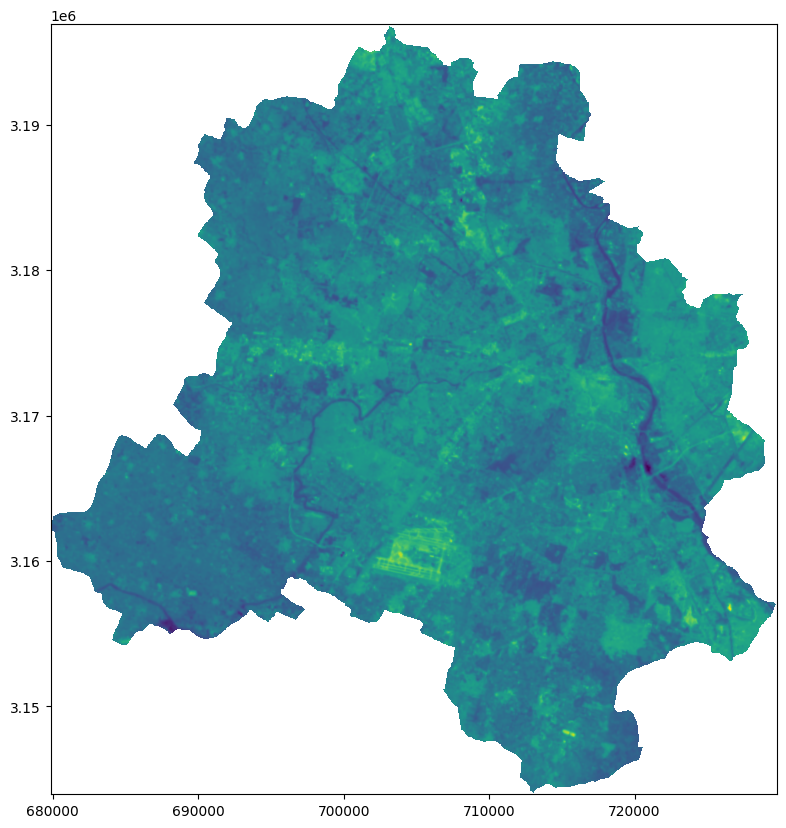

In [8]:
# masking B4,B5 and B10 using Module
# calling function mask_raster()

import os
from raster_masker import RasterMasker  # Import the RasterMasker class

# Set environment settings (Change the path as per your Colab or Drive location)
workspace = '/content/extracted_files/'
workspace_shp = '/content/drive/MyDrive/Delhi/'
output_workspace = '/content/output_files/'

# Ensure the output directory exists
if not os.path.exists(output_workspace):
    os.makedirs(output_workspace)

# Input raster files to be masked (bands 4, 5, 10, and 11)
input_rasters = {
     "B4": os.path.join(workspace, "LC09_L1TP_146040_20230602_20230602_02_T1_B4.TIF"),
    "B5": os.path.join(workspace, "LC09_L1TP_146040_20230602_20230602_02_T1_B5.TIF"),
    "B10": os.path.join(workspace, "LC09_L1TP_146040_20230602_20230602_02_T1_B10.TIF")
}

# Mask shapefile (area of interest)
mask_shapefile = os.path.join(workspace_shp, "Delhi_UTM.shp")

# Initialize the RasterMasker with the shapefile path
masker = RasterMasker(mask_shapefile)

# Perform extraction by mask for each band
for band_name, input_raster in input_rasters.items():
    output_raster = os.path.join(output_workspace, f"delhi_extracted_{band_name}.tif")
    masker.mask_raster(input_raster, output_raster)
    print(f"Extraction of band {band_name} completed. Output saved as {output_raster}")

# Optionally, visualize the extracted raster
import matplotlib.pyplot as plt
import rasterio.plot

output_raster_path = os.path.join(output_workspace, "delhi_extracted_B10.tif")
with rasterio.open(output_raster_path) as src:
    fig, ax = plt.subplots(figsize=(10, 10))
    rasterio.plot.show(src, ax=ax)
    plt.show()


This code uses the RasterMasker module to mask specific raster bands (B4, B5, B10, B11) of a Landsat image to the area of interest defined by a shapefile. It sets up the paths for input rasters, shapefile, and output directory. The RasterMasker class is initialized with the shapefile path, and its mask_raster method is called for each input raster to create a masked output. The code ensures that the output directory exists and saves the masked rasters there. Finally, it optionally visualizes the extracted raster for Band 10 using matplotlib and rasterio.

Note: before executing the above code please remember to copy the path of all the required directories and bands. Also update the shapefile path for your AOI in mask_shp.

# 7. Sun Correction of B4 & B5

Sun-corrected reflectance calculation completed.
Masking complete. Output saved to /content/output_files/sun_ref_cor_B4.tif
Masking complete. Output saved to /content/output_files/sun_ref_cor_B5.tif


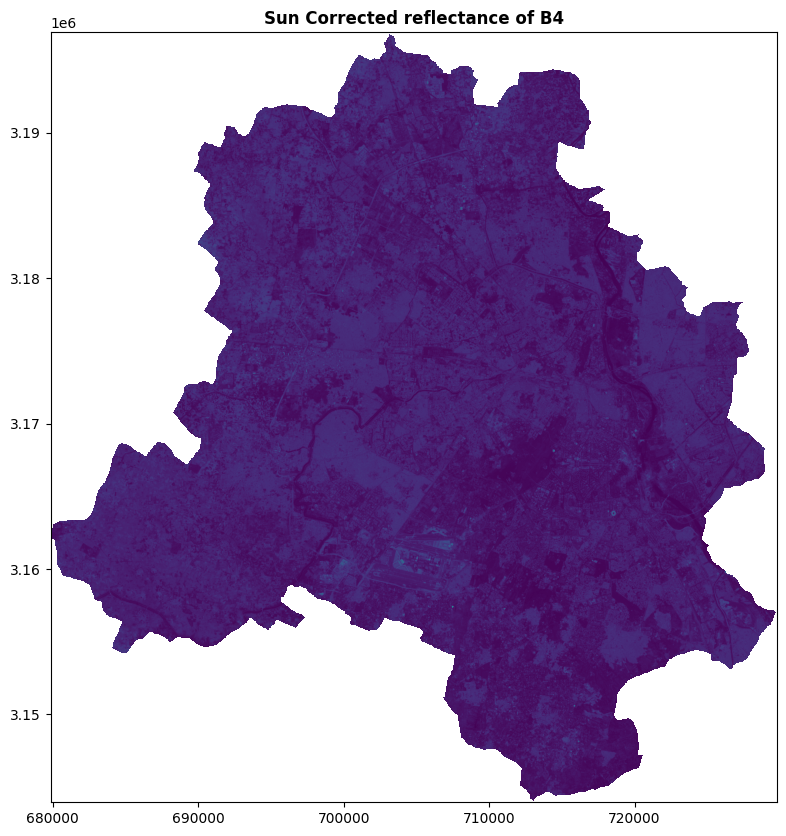

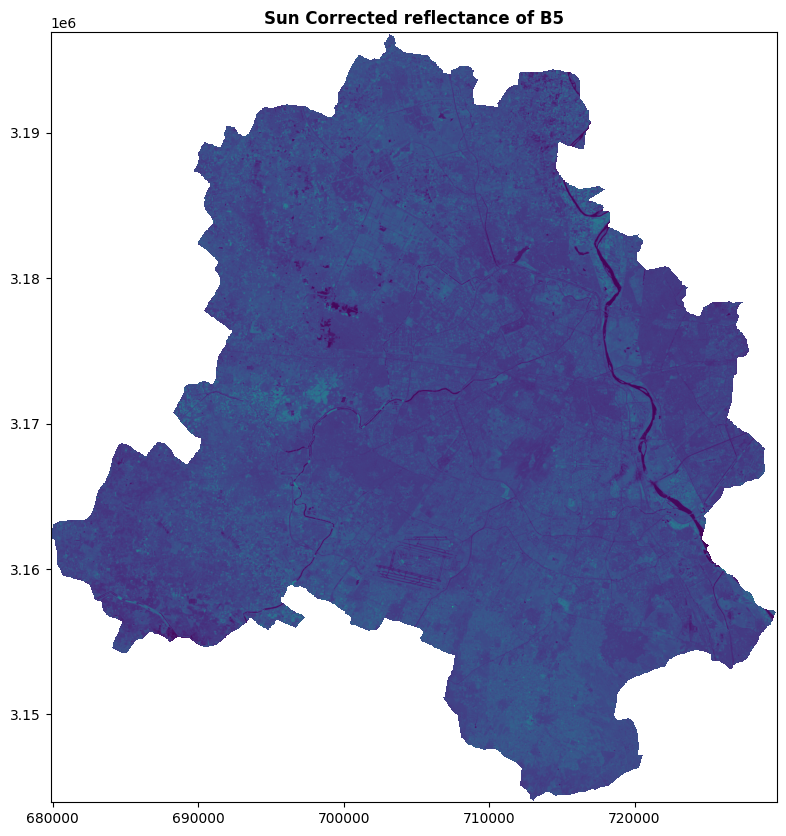

In [9]:
# sun correction for b4 and b5 data
# importing raster_masker

import os
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
from raster_masker import RasterMasker

# Define working directory
workspace = "/content/output_files/"
os.chdir(workspace)

# Input Landsat 8 bands (Update paths as needed)
band4_path = os.path.join(workspace, "delhi_extracted_B4.tif")  # Red band
band5_path = os.path.join(workspace, "delhi_extracted_B5.tif")  # Near Infrared band

# M_b4,M_b5, A_b4 and A_b5 values are taken from Metadata
# Reflectance multiplication factors (M)
M_b4 = 2.0000E-05
M_b5 = 2.0000E-05

# Reflectance additive factors (A)
A_b4 = -0.100000
A_b5 = -0.100000

# Sun elevation angle in degrees
sun_elevation = 68.82117212

# Output sun-corrected reflectance bands
output_b4_path = os.path.join(workspace, "B4_sun_cor_intermed.tif")
output_b5_path = os.path.join(workspace, "B5_sun_cor_intermed.tif")

try:
    # Open the bands
    with rasterio.open(band4_path) as band4_src:
        band4 = band4_src.read(1).astype(float)
        profile_b4 = band4_src.profile

    with rasterio.open(band5_path) as band5_src:
        band5 = band5_src.read(1).astype(float)
        profile_b5 = band5_src.profile

    # Perform sun correction
    corrected_b4 = ((band4 * M_b4) + A_b4) / np.sin(np.radians(sun_elevation))
    corrected_b5 = ((band5 * M_b5) + A_b5) / np.sin(np.radians(sun_elevation))

    # Update profile for the output
    profile_b4.update(dtype=rasterio.float32)
    profile_b5.update(dtype=rasterio.float32)

    # Save the output corrected reflectance bands
    with rasterio.open(output_b4_path, 'w', **profile_b4) as sun_correction_b4:
        sun_correction_b4.write(corrected_b4.astype(rasterio.float32), 1)

    with rasterio.open(output_b5_path, 'w', **profile_b5) as sun_correction_b5:
       sun_correction_b5.write(corrected_b5.astype(rasterio.float32), 1)

    print("Sun-corrected reflectance calculation completed.")


    # Paths
    shapefile_path = '/content/drive/MyDrive/Delhi/Delhi_UTM.shp'
    input_raster_path4 = '/content/output_files/B4_sun_cor_intermed.tif'
    output_raster_path4 = '/content/output_files/sun_ref_cor_B4.tif'

    input_raster_path5 = '/content/output_files/B5_sun_cor_intermed.tif'
    output_raster_path5 = '/content/output_files/sun_ref_cor_B5.tif'

    # Initialize the RasterMasker with the shapefile path
    masker = RasterMasker(shapefile_path)

    # Perform the masking operation
    masker.mask_raster(input_raster_path4, output_raster_path4)
    masker.mask_raster(input_raster_path5, output_raster_path5)

    sun_ref_cor_b4= output_raster_path4
    sun_ref_cor_b5= output_raster_path5

     # Display the corrected and masked image of B4 band
    with rasterio.open(output_raster_path4) as sun_ref_cor_b4:
        fig, ax = plt.subplots(figsize=(10, 10))
        show(sun_ref_cor_b4, ax=ax, title="Sun Corrected reflectance of B4")
        plt.show()

    # Display the corrected and masked image of B5 band
    with rasterio.open(output_raster_path5) as sun_ref_cor_b5:
        fig, ax = plt.subplots(figsize=(10, 10))
        show(sun_ref_cor_b5, ax=ax, title="Sun Corrected reflectance of B5")
        plt.show()

except Exception as e:
    print(f"Error occurred: {e}")


This code performs sun correction on Landsat 8 bands 4 (Red) and 5 (Near Infrared) to account for atmospheric and solar angle effects. It reads the raw band data, applies a correction formula using specific reflectance multiplication and additive factors, and adjusts for the sun elevation angle to obtain sun-corrected reflectance values. The corrected bands are then saved to new raster files. Additionally, the code uses a custom RasterMasker module to mask the corrected bands based on a shapefile, focusing on specific areas of interest. The final corrected and masked images are visualized using Matplotlib. Sun correction compensates for variations in solar angle and atmospheric conditions, providing more accurate surface reflectance measurements.

# 8. NDVI

NDVI calculation completed and saved at: /content/output_files/NDVI.tif


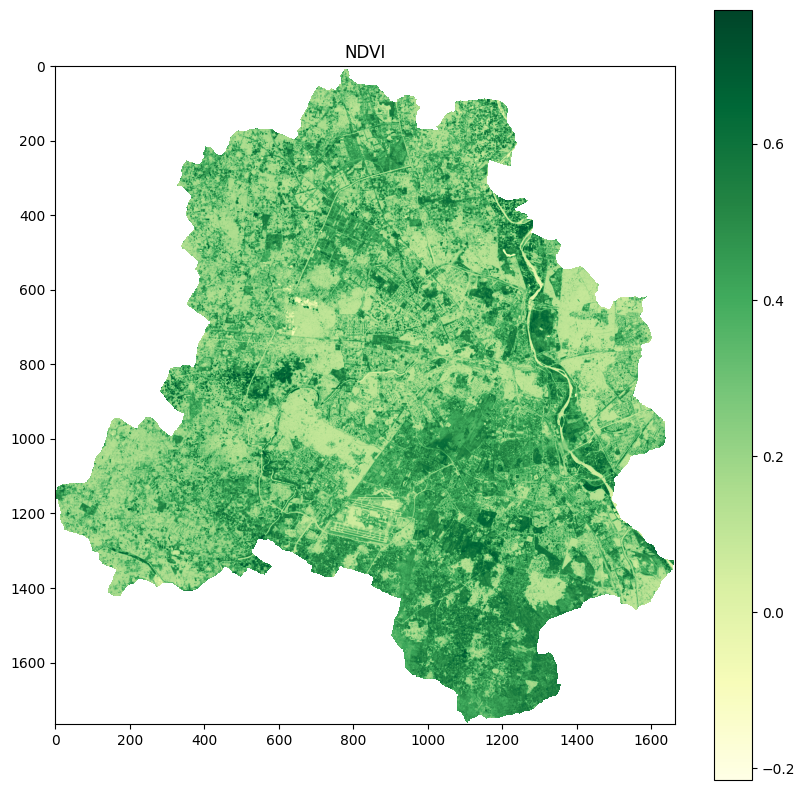

In [10]:
# NDVI calculation using pylandtemp

import os
import rasterio
import pylandtemp as pt
from pylandtemp import ndvi
import matplotlib.pyplot as plt

# Define the working directory
workspace = "/content/output_files/"
os.chdir(workspace)

# Input Landsat 8 bands (Update paths as needed)
band4_path = os.path.join(workspace, "sun_ref_cor_B4.tif")  # Red band
band5_path = os.path.join(workspace, "sun_ref_cor_B5.tif")  # Near Infrared (NIR) band

# Output NDVI file path
output_ndvi_path = os.path.join(workspace, "NDVI.tif")

try:
    with rasterio.open(band4_path) as src:
        redImage = src.read(1).astype('f4')
        profile = src.profile  # Save profile to use for NDVI output

    with rasterio.open(band5_path) as src:
        nirImage = src.read(1).astype('f4')

    # NDVI calculation using pylandtemp
    mask = redImage == 0
    ndvi = pt.ndvi(nirImage, redImage, mask=mask)

    # Update profile for NDVI output
    profile.update(dtype=rasterio.float32, count=1)

    # Save NDVI output to file
    with rasterio.open(output_ndvi_path, 'w', **profile) as dst:
        dst.write(ndvi.astype(rasterio.float32), 1)

    print("NDVI calculation completed and saved at:", output_ndvi_path)

    # Optional: Display the NDVI
    plt.figure(figsize=(10, 10))
    plt.imshow(ndvi, cmap='YlGn')
    plt.title("NDVI")
    plt.colorbar()
    plt.show()

except Exception as e:
    print(f"Error occurred: {e}")


This code calculates the Normalized Difference Vegetation Index (NDVI) using Landsat 8 satellite imagery, which is a measure of vegetation health and density. NDVI is computed by comparing the reflectance values in the Near Infrared (NIR) and Red bands of the spectrum.In this code, the pylandtemp library is used for the NDVI calculation. It reads the Red and NIR band data from raster files, applies the NDVI formula while handling zeros to avoid division errors, and saves the result to a new raster file. NDVI values range from -1 to 1, where values closer to 1 indicate high vegetation density and health, values around 0 suggest sparse or no vegetation, and negative values often indicate non-vegetated surfaces such as water or bare soil. The NDVI image is also visualized using Matplotlib. Error handling ensures that any issues during processing are caught and reported.

# 9. PV AND LSE

NDVI Min: -0.21502727270126343
NDVI Max: 0.7717083096504211
Proportional vegetation cover calculation completed. Output saved as proportional_vegetation.tif
Land surface emissivity calculation completed. Output saved as land_surface_emissivity.tif


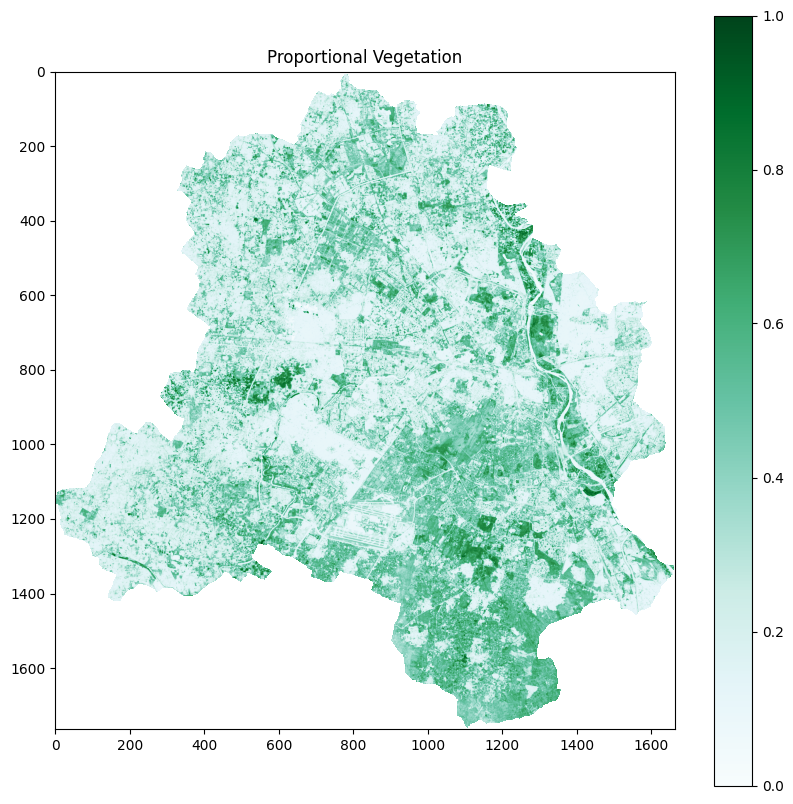

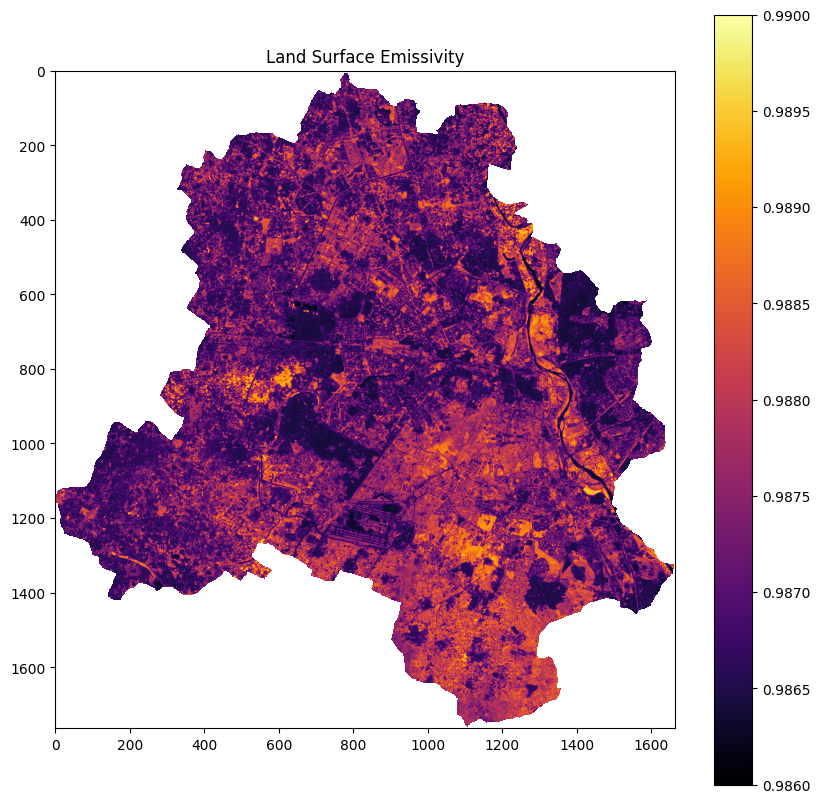

In [11]:
# proportional vegetation and Land Surface Emmisivity

import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define the working directory (update the path accordingly)
workspace = "/content/output_files"
os.chdir(workspace)

# Input NDVI raster
ndvi_raster = "NDVI.tif"

# Output filenames
output_pv = "proportional_vegetation.tif"
output_emissivity = "land_surface_emissivity.tif"

try:
    # Load NDVI raster
    with rasterio.open(ndvi_raster) as src:
        ndvi = src.read(1).astype(float)
        profile = src.profile

    # Find the minimum and maximum NDVI values
    ndvi_min = np.nanmin(ndvi)
    ndvi_max = np.nanmax(ndvi)

    # Print NDVI min and max values for verification
    print("NDVI Min:", ndvi_min)
    print("NDVI Max:", ndvi_max)

    # Calculate Fraction of Vegetation Cover (FVC) using the updated formula
    pv = ((ndvi - ndvi_min) / (ndvi_max - ndvi_min)) ** 2

    # Update profile for PV output
    profile.update(dtype=rasterio.float32, count=1)

    # Save the PV raster
    with rasterio.open(output_pv, 'w', **profile) as dst:
        dst.write(pv.astype(rasterio.float32), 1)
    print("Proportional vegetation cover calculation completed. Output saved as", output_pv)

    # Calculate Land Surface Emissivity using PV
    emissivity = ((0.004 * pv) + 0.986)

    # Save the emissivity raster
    with rasterio.open(output_emissivity, 'w', **profile) as dst:
        dst.write(emissivity.astype(rasterio.float32), 1)
    print("Land surface emissivity calculation completed. Output saved as", output_emissivity)

     # Display PV
    plt.figure(figsize=(10, 10))
    plt.imshow(pv, cmap='BuGn')
    plt.title("Proportional Vegetation")
    plt.colorbar()
    plt.show()

    # Display Land Surface Emissivity
    plt.figure(figsize=(10, 10))
    plt.imshow(emissivity, cmap='inferno')
    plt.title("Land Surface Emissivity")
    plt.colorbar()
    plt.show()

except Exception as e:
    print(f"Error occurred: {e}")

This code reads an NDVI raster file to calculate proportional vegetation cover and land surface emissivity. It first loads the NDVI data and determines the minimum and maximum NDVI values for normalization. The proportional vegetation (PV) is computed by normalizing and squaring the NDVI values. Using the PV values, it then calculates the land surface emissivity with a specific formula. Both the proportional vegetation and emissivity are saved as new raster files and visualized using Matplotlib to provide a graphical representation of the results. The code also includes error handling to ensure any issues during processing are reported.

# 10. Radiance

Masking complete. Output saved to /content/output_files/radiance.tif
TOA Radiance calculated and masked. Output saved as: /content/output_files/radiance.tif


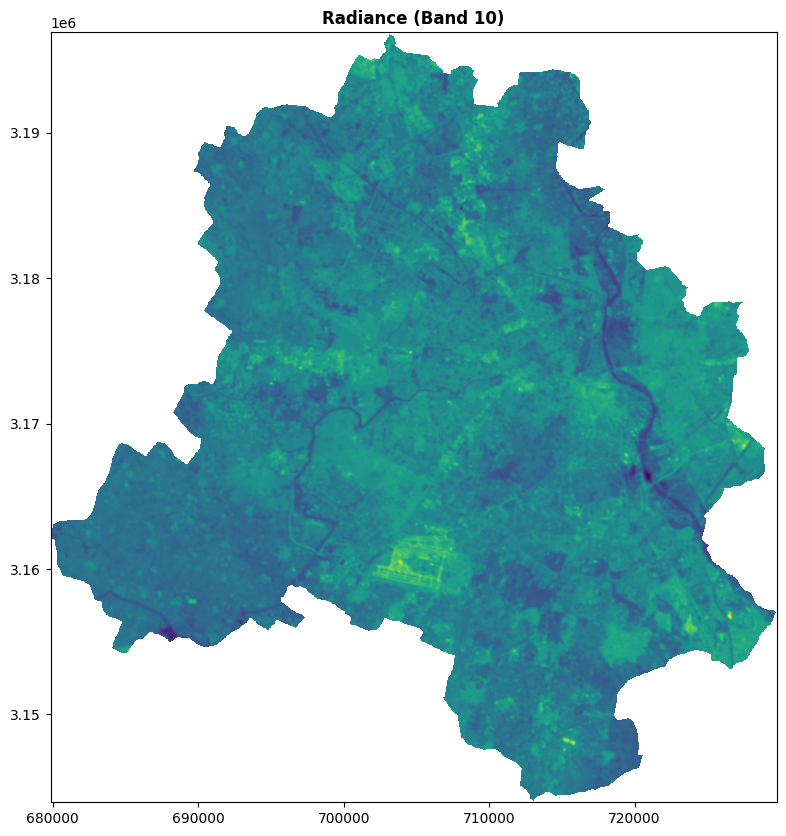

In [12]:
# radiance updated

import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
from raster_masker import RasterMasker  # Import your custom RasterMasker module

# Define the parameters for Landsat 8 Band 10
radiance_mult = 0.0003342
radiance_add = 0.1

# Function to convert DN to TOA Radiance
def dn_to_toa_radiance(DN,radiance_mult, radiance_add):
    return (radiance_mult * DN) + radiance_add

# Paths to input and output files
input_file = '/content/output_files/delhi_extracted_B10.tif'
output_file = '/content/output_files/intermediate_radiance.tif'
shapefile_path = '/content/drive/MyDrive/Delhi/Delhi_UTM.shp'
masked_output_file = '/content/output_files/radiance.tif'


# Open the input raster file to read digital numbers
with rasterio.open(input_file) as src:
    # Read the digital numbers from the first band
    dn = src.read(1)

    # Convert DN to TOA Radiance
    toa_radiance = dn_to_toa_radiance(dn,radiance_mult,radiance_add)

    # Copy the metadata for the output file
    metadata = src.meta.copy()
    metadata.update(dtype=rasterio.float32, count=1)

    # Save the TOA Radiance to a new raster file
    with rasterio.open(output_file, 'w', **metadata) as dst:
        dst.write(toa_radiance.astype(rasterio.float32), 1)

# Mask the TOA radiance raster using the RasterMasker class
masker = RasterMasker(shapefile_path)
masker.mask_raster(output_file, masked_output_file)

print(f"TOA Radiance calculated and masked. Output saved as: {masked_output_file}")

# Display the masked output
with rasterio.open(masked_output_file) as masked_src:
    fig, ax = plt.subplots(figsize=(10, 10))
    show(masked_src, ax=ax, title="Radiance (Band 10)")
    plt.show()

This code processes a Landsat 8 Band 10 raster image to convert digital numbers (DN) into Top-of-Atmosphere (TOA) radiance using specified conversion factors. It reads the DN values from the input raster, applies the conversion formula, and saves the result as a new raster file. The code then uses a custom RasterMasker class to mask the TOA radiance raster based on a shapefile. Finally, it displays the masked radiance image using Matplotlib. The processing includes saving intermediate results and visualizing the final output.

# 11. Brightness Temperature

Masking complete. Output saved to /content/output_files/BT_band10.tif
Temperature data calculated and masked. Output saved as: /content/output_files/BT_band10.tif


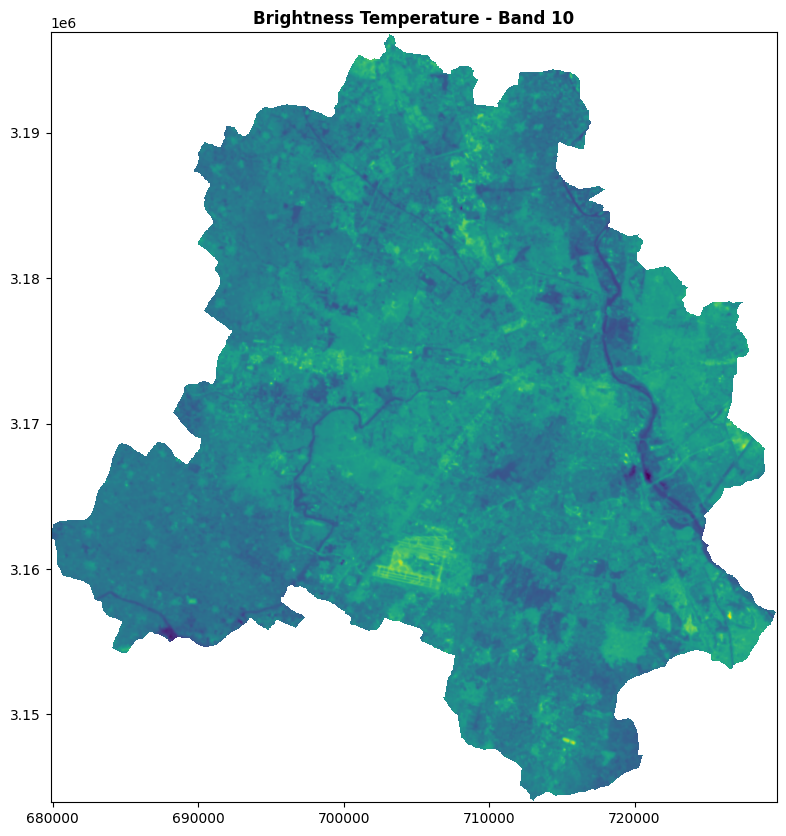

In [13]:
# BT code

import numpy as np
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
from raster_masker import RasterMasker  # Import the custom RasterMasker module

# Define the parameters for Landsat 8 Band 10
K1 = 774.89     # K1 constant for Landsat 8 Band 10
K2 = 1321.08    # K2 constant for Landsat 8 Band 10

# Function to convert TOA Radiance to At-Sensor Temperature
def toa_radiance_to_temperature(toa_radiance, K1, K2):
    # Avoid division by zero by adding a small constant to the denominator
    small_value = 1e-10
    toa_radiance = np.maximum(toa_radiance, small_value)

    # Convert TOA radiance to temperature in Celsius
    temperature_kelvin = K2 / np.log((K1 / toa_radiance) + 1)
    temperature_celsius = temperature_kelvin - 273.15
    return temperature_celsius

# Paths to input and output files
input_file = '/content/output_files/radiance.tif'
output_file = '/content/output_files/BTband10_intermed.tif'
shapefile_path = '/content/drive/MyDrive/Delhi/Delhi_UTM.shp'
masked_output_file = '/content/output_files/BT_band10.tif'

# Open the input raster file to read TOA radiance
with rasterio.open(input_file) as src:
    # Read the TOA radiance values from the first band
    toa_radiance = src.read(1)

    # Convert TOA Radiance to At-Sensor Temperature
    temperature = toa_radiance_to_temperature(toa_radiance, K1, K2)

    # Copy the metadata for the output file
    metadata = src.meta.copy()
    metadata.update(dtype=rasterio.float32, count=1)

    # Save the Temperature data to a new raster file
    with rasterio.open(output_file, 'w', **metadata) as dst:
        dst.write(temperature.astype(rasterio.float32), 1)

# Mask the output using RasterMasker
masker = RasterMasker(shapefile_path)
masker.mask_raster(output_file, masked_output_file)

print(f"Temperature data calculated and masked. Output saved as: {masked_output_file}")

# Display the final masked output
with rasterio.open(masked_output_file) as masked_src:
    fig, ax = plt.subplots(figsize=(10, 10))
    show(masked_src, ax=ax, title="Brightness Temperature - Band 10")
    plt.show()


This code converts Top-of-Atmosphere (TOA) radiance from a Landsat 8 Band 10 raster into brightness temperature in Celsius. It reads TOA radiance values, applies the conversion formula using constants specific to Band 10, and saves the resulting temperature data to a new raster file. The code then masks this temperature raster based on a shapefile using a custom RasterMasker class and displays the final masked brightness temperature image using Matplotlib. The processing includes saving intermediate results and visualizing the final output as Brightness Temperature.

# 12. Land Surface Temperature

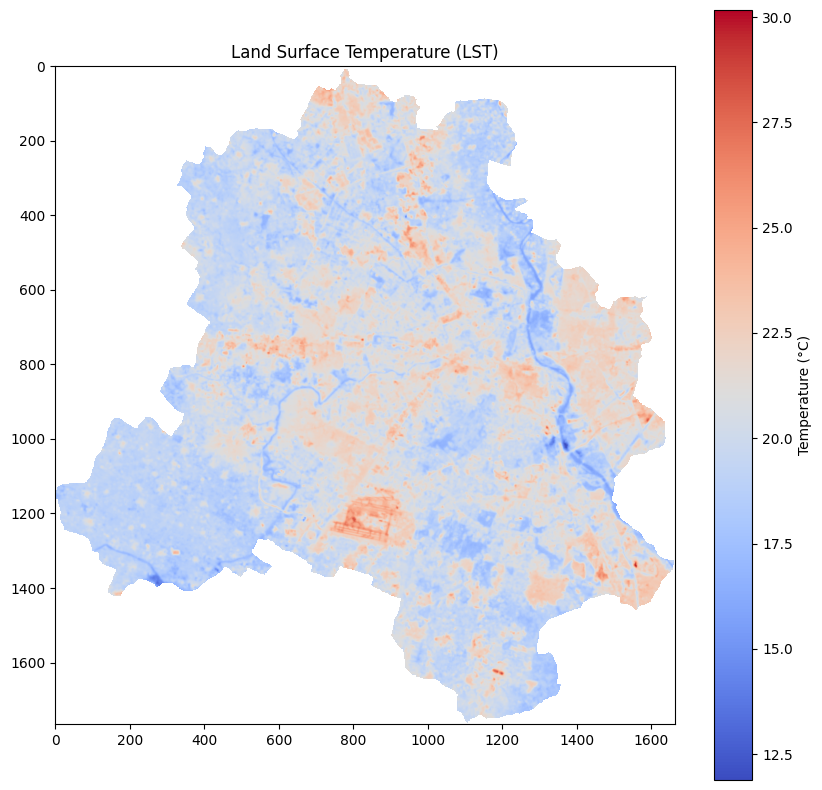

In [14]:
#LST

import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define the working directory (update the path accordingly)
workspace = "/content/output_files/"
os.chdir(workspace)

# Input brightness temperature and land surface emissivity rasters
bt_raster = "BT_band10.tif"
lse_raster = "land_surface_emissivity.tif"

# Output Land Surface Temperature raster
output_lst = "land_surface_temperature.tif"

try:
    # Load brightness temperature raster
    with rasterio.open(bt_raster) as src_bt:
        bt = src_bt.read(1).astype(float)
        bt_profile = src_bt.profile

    # Load land surface emissivity raster
    with rasterio.open(lse_raster) as src_lse:
        lse = src_lse.read(1).astype(float)

    # Define constants
    constant1 = 0.00115
    constant2 = 1.4388

    # Calculate LST using the given formula
    lst = bt / (1 + (constant1 * bt / constant2) * np.log(lse))

    # Calculate statistics
    min_val = np.min(lst)
    max_val = np.max(lst)
    mean_val = np.mean(lst)
    std_val = np.std(lst)

    # Update profile for the output file
    bt_profile.update(dtype=rasterio.float32, count=1)

    # Save the LST raster with updated metadata
    with rasterio.open(output_lst, 'w', **bt_profile) as dst:
        dst.write(lst.astype(rasterio.float32), 1)

        # Add statistics to metadata
        dst.update_tags(
            min_val=min_val,
            max_val=max_val,
            mean_val=mean_val,
            std_val=std_val,
            Statistics=f"Min: {min_val}, Max: {max_val}, Mean: {mean_val}, StdDev: {std_val}"
        )

    # Display the LST raster
    plt.figure(figsize=(10, 10))
    plt.imshow(lst, cmap='coolwarm')
    plt.title("Land Surface Temperature (LST)")
    plt.colorbar(label="Temperature (°C)")
    plt.show()

except Exception as e:
    print(f"Error occurred: {e}")


Above code calculates the Land Surface Temperature (LST) from brightness temperature and land surface emissivity rasters. It reads the input rasters, applies the LST formula, and saves the result to a new raster file. The code also calculates basic statistics (minimum, maximum, mean, and standard deviation) for the LST data and adds these statistics to the raster metadata. Finally, it visualizes the LST using Matplotlib with a color map that represents temperature. Error handling is included to manage any issues during execution.



# 13. Urban Heat Island

Masking complete. Output saved to /content/output_files/uhi_classification.tif


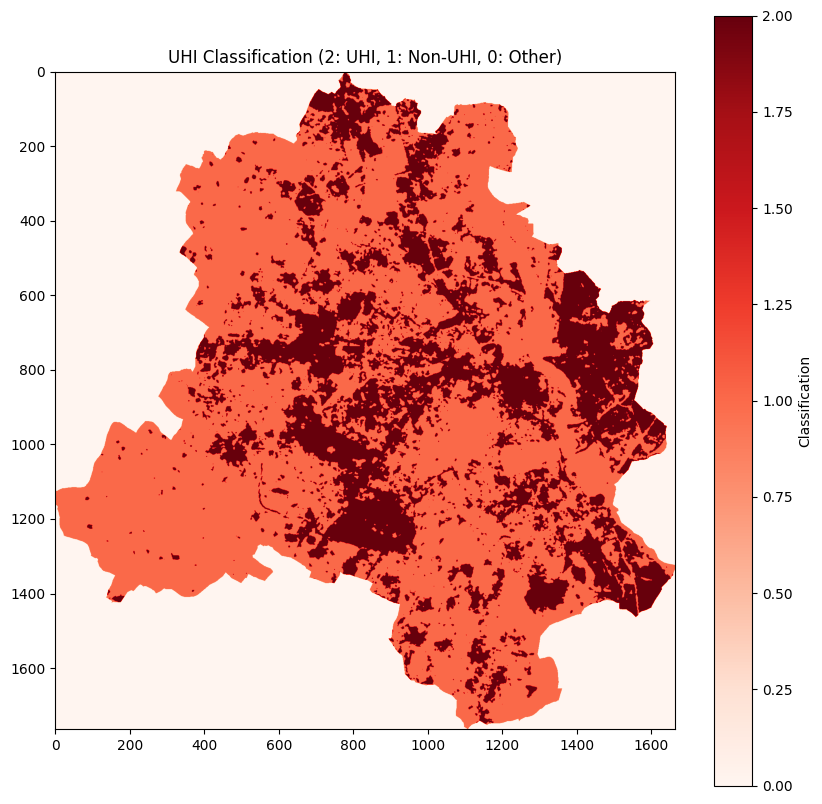

Masked UHI classification saved as: /content/output_files/uhi_classification.tif


In [15]:
# UHI Classification with range
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from raster_masker import RasterMasker  # Import the custom RasterMasker module

# Define the paths
lst_raster_path = "/content/output_files/land_surface_temperature.tif"
shapefile_path = "/content/drive/MyDrive/Delhi/Delhi_UTM.shp"
output_uhi = "/content/output_files/uhi_classification_intermediate.tif"
masked_output_uhi = "/content/output_files/uhi_classification.tif"


try:
    # Open the LST raster file
    with rasterio.open(lst_raster_path) as src:
        lst_data = src.read(1).astype(float)
        original_nodata = src.nodata

        # Replace the original nodata value with np.nan
        lst_data[lst_data == original_nodata] = np.nan

        # Calculate the statistics
        mean_val = np.nanmean(lst_data)
        std_val = np.nanstd(lst_data)

        # Define UHI thresholds
        threshold_high = mean_val + 0.5 * std_val
        threshold_low = 0

        # Classify UHI areas
        uhi_high = (lst_data > threshold_high).astype(np.uint8)
        uhi_low = ((lst_data > threshold_low) & (lst_data <= threshold_high)).astype(np.uint8)

        # Combine the results into a single array (2: UHI, 1: Non-UHI, 0: Other)
        uhi_classification = np.zeros_like(lst_data, dtype=np.uint8)
        uhi_classification[uhi_low == 1] = 1
        uhi_classification[uhi_high == 1] = 2

        # Update profile for the output file
        profile = src.profile
        profile.update(dtype=rasterio.uint8, count=1, nodata=0)

        # Save the UHI classification raster
        with rasterio.open(output_uhi, 'w', **profile) as dst:
            dst.write(uhi_classification, 1)

    # Apply masking to the final UHI classification output
    masker = RasterMasker(shapefile_path)
    masker.mask_raster(output_uhi, masked_output_uhi)

    # Display the masked UHI classification
    with rasterio.open(masked_output_uhi) as masked_src:
        masked_uhi = masked_src.read(1)
        plt.figure(figsize=(10, 10))
        plt.imshow(masked_uhi, cmap='Reds', vmin=0, vmax=2)
        plt.title("UHI Classification (2: UHI, 1: Non-UHI, 0: Other)")
        plt.colorbar(label="Classification")
        plt.show()

    print(f"Masked UHI classification saved as: {masked_output_uhi}")

except Exception as e:
    print(f"Error occurred: {e}")


This code classifies Urban Heat Island (UHI) areas based on Land Surface Temperature (LST) data. It reads the LST raster, calculates the mean and standard deviation to set classification thresholds, and then classifies the data into UHI (2), Non-UHI (1), and Other (0) categories. The classification results are saved to a new raster file. It then masks the classification result using a shapefile to focus on specific areas and visualizes the final UHI classification with a color map using Matplotlib. Error handling is included to address any issues during processing.


# 14. Urban Heat Island

Masking complete. Output saved to /content/output_files/uhi_class.tif


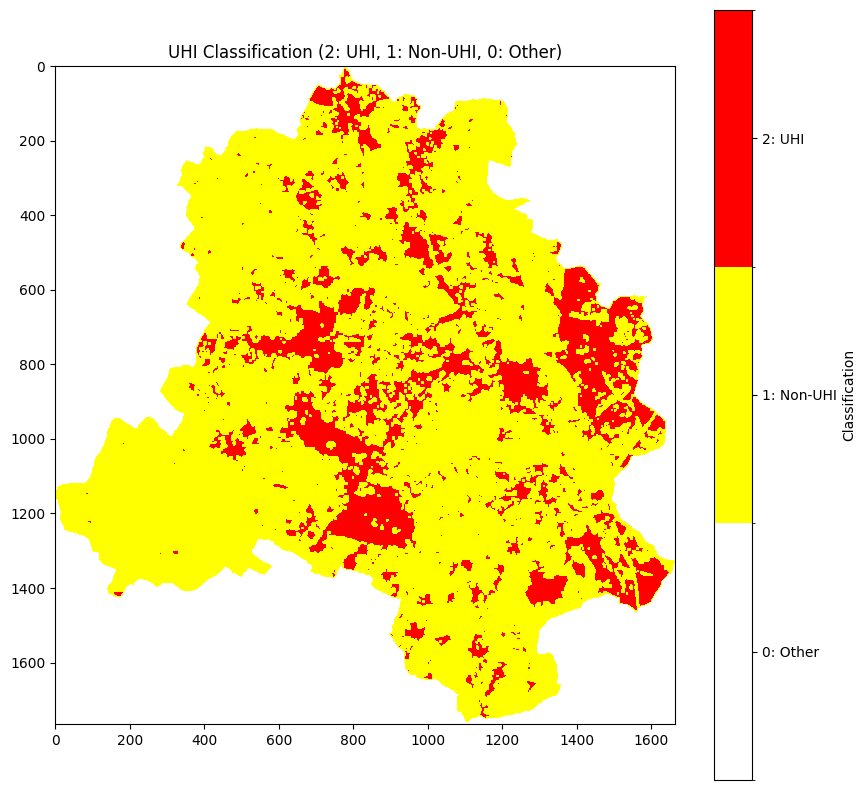

UHI classification saved as: /content/output_files/uhi_class.tif


In [16]:
# UHI classes

import rasterio
import numpy as np
import matplotlib.pyplot as plt
from raster_masker import RasterMasker  # Import the custom RasterMasker module
import matplotlib.colors as mcolors

# Define the paths
lst_raster_path = "/content/output_files/land_surface_temperature.tif"
shapefile_path = "/content/drive/MyDrive/Delhi/Delhi_UTM.shp"
output_uhi = "/content/output_files/uhi_class_intermediate.tif"
masked_output_uhi = "/content/output_files/uhi_class.tif"
try:
    # Open the LST raster file
    with rasterio.open(lst_raster_path) as src:
        lst_data = src.read(1).astype(float)
        original_nodata = src.nodata

        # Replace the original nodata value with np.nan
        lst_data[lst_data == original_nodata] = np.nan

        # Calculate the statistics
        mean_val = np.nanmean(lst_data)
        std_val = np.nanstd(lst_data)

        # Define UHI thresholds
        threshold_high = mean_val + 0.5 * std_val
        threshold_low = 0

        # Classify UHI areas
        uhi_high = (lst_data > threshold_high).astype(np.uint8)
        uhi_low = ((lst_data > threshold_low) & (lst_data <= threshold_high)).astype(np.uint8)

        # Combine the results into a single array (2: UHI, 1: Non-UHI, 0: Other)
        uhi_classification = np.zeros_like(lst_data, dtype=np.uint8)
        uhi_classification[uhi_low == 1] = 1
        uhi_classification[uhi_high == 1] = 2

        # Update profile for the output file
        profile = src.profile
        profile.update(dtype=rasterio.uint8, count=1, nodata=0)

        # Save the UHI classification raster
        with rasterio.open(output_uhi, 'w', **profile) as dst:
            dst.write(uhi_classification, 1)

    # Apply masking to the final UHI classification output
    masker = RasterMasker(shapefile_path)
    masker.mask_raster(output_uhi, masked_output_uhi)

    # Display the masked UHI classification
    with rasterio.open(masked_output_uhi) as masked_src:
        masked_uhi = masked_src.read(1)

        # Create a discrete colormap
        cmap = mcolors.ListedColormap(['white', 'yellow', 'red'])
        bounds = [0, 1, 2, 3]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        plt.figure(figsize=(10, 10))
        img = plt.imshow(masked_uhi, cmap=cmap, norm=norm)
        plt.title("UHI Classification (2: UHI, 1: Non-UHI, 0: Other)")

        # Add colorbar with ticks for each class
        cbar = plt.colorbar(img, ticks=[0.5, 1.5, 2.5])
        cbar.ax.set_yticklabels(['0: Other', '1: Non-UHI', '2: UHI'])
        cbar.set_label("Classification")

        plt.show()

    print(f"UHI classification saved as: {masked_output_uhi}")

except Exception as e:
    print(f"Error occurred: {e}")


This code classifies Urban Heat Island (UHI) areas from Land Surface Temperature (LST) data by setting thresholds based on mean and standard deviation. It classifies pixels into UHI (2), Non-UHI (1), or Other (0) and saves the results to a raster file. The classification raster is then masked using a shapefile to focus on specific regions. The code visualizes the masked UHI classification using a discrete colormap with distinct colors for each class, and displays a colorbar with labels to indicate the class values. Error handling is included to address any processing issues.